### About the Dataset:

1. There are two datsets. We need to solve the challenges that are faced by the bank wrt credit lending.
2. First dataset is (i)  Internal bank dataset and second is (ii) Cibil external dataset.
3. The target variable is Approved_Flag  which contain 4 categories ['P2' 'P1' 'P3' 'P4'], segregating  the customer into class of giving the credit.
4. There are total 84 columns in two datasets. 26 columns in the first dataset and 62 columns in the second dataset.
7. PROSPECTID col is a common column in both the first and second datasets indicating unique customer ID.
8. For feature selection or in order to find associated columns,  we need to perform chi2 square test and Anova test, since the target column is categorical column
9. For cat v/s cat columns (i.e 'gender' 'last_prod_enq2', 'first_prod_enq2', 'Education' and 'martial status' columns) we will perform chi2 square test
10. For numerical columns v/s multi class category col i.e Approved_Flag column, we will perform Anova test
9. By checking the p_value of each column wrt target variable, we can  decide if it's statistically significant or not



1. For feature selection or in order to find most associated columns,  we need to perform chi2 square test and Anova test, since the target column is categorical column
2. For cat v/s cat columns we will perform chi2 square test
3. For numerical columns v/s multi class category col, we will perform Anova test
4. if there are only 2 categories in target categorical and we want to find association between num v/s col column then perform t-test.
5. Before comparing numerical columns v/s target categorical column, perform VIF analysis to check multi collinearity among predictor or to check co relation between num and num cols. If there is any multi collinearity then keep only one of the columns and then perform Anova / t test



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
%pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
df1 = pd.read_excel('/content/bank data.xlsx')
df2 = pd.read_excel('/content/cibil data.xlsx')

In [ ]:
df1.shape

(51336, 26)

In [ ]:
df1.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL'],
      dtype='object')

In [ ]:
print(f"Size of bank internal dataset {df1.shape}")
df1.sample(10)

Size of bank internal dataset (51336, 26)


,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
51103,51104,5,2,3,2,0,0.400,0.0,0.600,0.400,...,0,2,1,0,0,3,2,1,41,2
46670,46671,2,0,2,0,0,0.000,0.0,1.000,0.000,...,0,0,0,1,0,2,0,1,8,8
16595,16596,1,1,0,0,0,0.000,0.0,0.000,1.000,...,0,1,0,0,0,0,1,0,16,16
38769,38770,2,1,1,0,0,0.000,0.0,0.500,0.500,...,0,1,0,0,0,1,1,0,17,7
40525,40526,5,3,2,0,3,0.000,0.6,0.400,0.600,...,0,4,0,0,1,0,5,0,16,10
12394,12395,1,1,0,0,0,0.000,0.0,0.000,1.000,...,0,0,0,0,0,1,0,0,73,73
28973,28974,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,8,8
34297,34298,3,0,3,2,0,0.667,0.0,1.000,0.000,...,0,2,0,0,0,0,3,1,23,3
26685,26686,1,1,0,0,0,0.000,0.0,0.000,1.000,...,0,0,0,0,0,1,0,0,45,45
48511,48512,14,13,1,0,0,0.000,0.0,0.071,0.929,...,0,1,13,0,0,13,1,0,65,13


In [ ]:
print(f"Size of cibil dataset {df2.shape}")
df2.sample(10)

Size of cibil dataset (51336, 62)


,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
8396,8397,42,5,5,1,25,25,1,1,0,...,0.0,0.0,0.0,2.806,0,0,ConsumerLoan,others,669,P2
34780,34781,474,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,1,0,others,others,680,P2
44491,44492,165,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,1,0,others,others,707,P1
1364,1365,229,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,others,others,686,P2
7621,7622,864,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,ConsumerLoan,ConsumerLoan,672,P2
47459,47460,40,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.028,0,0,others,others,679,P2
957,958,63,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,-99999.000,0,0,others,PL,657,P4
24972,24973,88,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.099,0,0,ConsumerLoan,ConsumerLoan,673,P2
35077,35078,105,15,15,1,26,26,0,0,0,...,0.0,0.0,0.0,-99999.000,1,0,AL,others,683,P2
1499,1500,19,18,13,7,87,31,0,0,0,...,0.0,0.0,0.0,-99999.000,1,0,ConsumerLoan,others,721,P1


In [ ]:
df2.shape

(51336, 62)

In [ ]:
df2.columns

Index(['PROSPECTID', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Fla

In [ ]:
columns = df2.columns.tolist()
columns

['PROSPECTID',
 'time_since_recent_payment',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'num_times_delinquent',
 'max_delinquency_level',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',
 'MARITALSTATUS',
 'EDUCATION',
 'AGE',
 'GENDER',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'pct_of_active_TLs_ever',
 'pct_opened_TLs_L6m_of_L12m',
 'pct_currentBal_all_TL',
 'CC_utilization',
 'CC_Flag',
 'PL_utilization',
 'PL_Flag',
 'pct_PL_enq_L6m_of_L12m',
 'pct_CC_enq_L6m_of_L12

### Important points:
1. The shape of bank internal dataset of customer is (51336, 26).
2. The shape of cibil dataset is (51336, 62).
3. The common column in both datset is PROSPECTID which is unique ID for each customer.
4. The value "-99999" are null values in both the daetset
5. We will remove all the null values if data lost is less than 20% of the total dataset.
**6. Total trade lines is total no of accounts of a customer**

##REMOVING NULL VALUES FROM DF1

In [ ]:
df1=df1[~(df1["Age_Oldest_TL"]==-99999)]

In [ ]:
df1.shape

(51296, 26)

## REMOVING NULL VALUES FROM DF2
## -99999 are null values , if there are less , removing those rows , if there are more than 10000 null values present in a particular column , then removing those columns . ( if null values exceeding 20 % of my data )

In [ ]:
col_to_drop=[]
for i in df2.columns:
#     print(df2[df2[i]==-99999].shape[0])
    if(df2[df2[i]==-99999].shape[0])>10000:
        col_to_drop.append(i)
        print(i)

time_since_first_deliquency
time_since_recent_deliquency
max_delinquency_level
max_deliq_6mts
max_deliq_12mts
CC_utilization
PL_utilization
max_unsec_exposure_inPct


time_since_first_deliquency,
time_since_recent_deliquency,
max_delinquency_level,
max_deliq_6mts,
max_deliq_12mts,
CC_utilization,
PL_utilization,
max_unsec_exposure_inPct.
###These are the columns that are having more than 10000 null values . removing these 8 columns will result in better performance .

###Therefore as we are dealing with deliquiencies , we cannot assume any value like a mean , mode or median .

In [ ]:
#dropping the columns
df2.drop(columns=col_to_drop,inplace=True)

In [ ]:
df2.shape

(51336, 54)

In [ ]:
#Now removing those rows that contain -99999 values
for i in df2.columns:
    print(df2[df2[i]==-99999].shape[0])
    df2=df2[~(df2[i]==-99999)]

0
4291
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4944
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
35
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
df2.shape

(42066, 54)

##Checking if there are any null values present or not

In [ ]:
df2.isnull().sum()

PROSPECTID                    0
time_since_recent_payment     0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
tot_enq                       0
CC_enq                        0
CC_enq_L6m                    0
CC_enq_L12m                   0
PL_enq                        0
PL_enq_L6m                    0
PL_enq_L12m                   0
time_since_recent_enq         0
enq_L12m                      0
enq_L6m 

In [ ]:
df1.isnull().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

### Merging both the dataset on common column "PROSPECTID"

In [ ]:
df=pd.merge(df1,df2,how='inner',left_on='PROSPECTID',right_on='PROSPECTID')

In [ ]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.0,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3


In [ ]:
df.shape

(42064, 79)

In [ ]:
df.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq',
       'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m',
       'PL_enq_L12

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [ ]:
df.isnull().sum().sum()

0

### Seprating categorical and numerical col

In [ ]:
cat_col=df.select_dtypes("object").columns

In [ ]:
len(cat_col)

6

In [ ]:
num_col=df.select_dtypes("number").columns

In [ ]:
len(num_col)

73

## Perform chi2 Square test for all categorical columns wrt target column i.e. Approved_Flag

chi2_square test is for cat v/s cat columns

###Now checking the unique values in cat_col

In [ ]:
for i in cat_col:
    print("Unique values in: ",i)
    print(df[i].value_counts())
    print("Total Unique Values are:",df[i].nunique())
    print("*"*50)
    print()

Unique values in:  MARITALSTATUS
MARITALSTATUS
Married    30886
Single     11178
Name: count, dtype: int64
Total Unique Values are: 2
**************************************************

Unique values in:  EDUCATION
EDUCATION
GRADUATE          14140
12TH              11703
SSC                7241
UNDER GRADUATE     4572
OTHERS             2291
POST-GRADUATE      1898
PROFESSIONAL        219
Name: count, dtype: int64
Total Unique Values are: 7
**************************************************

Unique values in:  GENDER
GENDER
M    37345
F     4719
Name: count, dtype: int64
Total Unique Values are: 2
**************************************************

Unique values in:  last_prod_enq2
last_prod_enq2
ConsumerLoan    16480
others          13653
PL               7553
CC               2195
AL               1353
HL                830
Name: count, dtype: int64
Total Unique Values are: 6
**************************************************

Unique values in:  first_prod_enq2
first_prod_enq2
other

###APPLYING CHI-SQUARE TEST FOR CATEGORICAL COLUMNS


In [ ]:
from scipy.stats import chi2_contingency,chisquare

In [ ]:
for i in cat_col[:-1]:
    chie,p_value,_,_=chi2_contingency(pd.crosstab(df[i],df[cat_col[-1]]))
    print(i," -- ",p_value)

MARITALSTATUS  --  3.578180861038862e-233
EDUCATION  --  2.6942265249737532e-30
GENDER  --  1.907936100186563e-05
last_prod_enq2  --  0.0
first_prod_enq2  --  7.84997610555419e-287


### Since the p_value of all categorical columns is less than 0.05, therefore all the categorical columns are important to build the model.

# Now working on Num-Col
1. we will check the relation of each num to every other num col.
2. we will also check the relation of num col to target col which is a categorical col.

###First performing multicollinearity between numerical cols. If 2 or more cols are co-related we will keep only one of the numerical columns. Then I will perform ANOVA test to reduce more features.

### For multicollinearity I have used VIF (variance Inflation Factor). If the value of VIF is less than 6, we will keep the column, otherwise we will drop it.

### VIF = 1 (NO MULTICOLLINEARITY)
### VIF BETWEEN 2 & 5 = (LOW MULTICOLLINEARITY)
### VIF BETWEEN 5 & 10 = (MODERATE MULTICOLLINEARITY)
### VIF ABOVE 10  = (HIGH MULTICOLLINEARITY)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
col_to_kept=[]
vif_data=df[num_col]
columns_index=0
for i in range(num_col.shape[0]):
    var_value=variance_inflation_factor(vif_data,columns_index)
    print(i,"-----",var_value)

    if(var_value<=6):
        col_to_kept.append(num_col[i])
        columns_index+=1
    else:
        vif_data=vif_data.drop(columns=num_col[i],axis=1)

0 ----- 1.001471445375174
1 ----- inf
2 ----- inf
3 ----- 11.320645246142803
4 ----- 8.364064272336133
5 ----- 6.520792569522158
6 ----- 5.1498060557107745
7 ----- 2.6112073771674944
8 ----- inf
9 ----- 1789.5578922792413
10 ----- 8.601096683974646
11 ----- 3.832851362174614
12 ----- 6.099768198336666
13 ----- 5.581446751193094
14 ----- 1.9856551389669777
15 ----- inf
16 ----- 4.809807520859606
17 ----- 23.27288184101288
18 ----- 30.596519319624697
19 ----- 4.3848122091115815
20 ----- 3.064673562463159
21 ----- 2.8986527303140015
22 ----- 4.377945210179218
23 ----- 2.2078562659546592
24 ----- 4.920018225898837
25 ----- 5.215354852494453
26 ----- 3.3862072703025055
27 ----- 7.841101396160445
28 ----- 5.25526382912626
29 ----- inf
30 ----- 7.380644570758274
31 ----- 1.4210119761829276
32 ----- 8.083354471350239
33 ----- 1.6241477619270308
34 ----- 7.257891375429919
35 ----- 15.596252041665208
36 ----- 1.8261329696765474
37 ----- 1.5080847785865654
38 ----- 2.172126715951355
39 ----- 2.62

In [ ]:
len(col_to_kept)

40

#**Reasons for Choosing VIF = 6**

##**Practical Considerations: **
Balancing Multicollinearity and Model Complexity: In practice, eliminating all variables with a VIF above 5 can sometimes result in the loss of important predictors that significantly contribute to the model’s predictive power. Setting a slightly higher threshold (e.g., 6) allows you to retain these variables, thus preserving the model’s explanatory ability while still managing multicollinearity at an acceptable level.
##**Model Stability and Performance:**
Improving Predictive Performance: While low multicollinearity (VIF < 5) is desirable, completely eliminating variables with moderate multicollinearity (VIF between 5 and 10) can sometimes degrade model performance. By setting the threshold at 6, you can strike a balance between minimizing multicollinearity and maintaining model accuracy and robustness.
##**Domain-Specific Insights:**
Importance of Specific Features: In the context of credit risk assessment, certain features might have inherent relationships due to financial regulations, market conditions, or customer behavior patterns. These relationships can result in moderate multicollinearity. Removing variables with VIFs slightly above 5 might discard valuable domain-specific insights, leading to a less informative model.
**##Model Interpretability:**
Retaining Interpretability: For financial models, interpretability is crucial. By allowing a VIF threshold of 6, you can keep important predictors in the model, thus making it easier for stakeholders to understand and trust the model’s predictions, while still controlling for excessive multicollinearity.

**### Performing ANOVA test for all numerical columns w.r.t target column**

Anova test is for num cols v/s cat column, but when the target column have multiple categories. If there is only two categories in the target column then t_test is the way to go.

In [ ]:
from scipy.stats import f_oneway

In [ ]:
col_to_kept_remaing=[]
for i in col_to_kept:
    curr_col=df[i]
    target_col=df[cat_col[-1]]

    group1=[value for value,group in zip(curr_col,target_col) if group=='P1']
    group2=[value for value,group in zip(curr_col,target_col) if group=='P2']
    group3=[value for value,group in zip(curr_col,target_col) if group=='P3']
    group4=[value for value,group in zip(curr_col,target_col) if group=='P4']

    f_stats,p_value=f_oneway(group1,group2,group3,group4)
    print(i,"-----",p_value)
    if(p_value<0.05):
        col_to_kept_remaing.append(i)

PROSPECTID ----- 0.04216738785382283
pct_tl_open_L6M ----- 0.0
pct_tl_closed_L6M ----- 2.676086811190998e-52
Tot_TL_closed_L12M ----- 1.762685578230421e-99
pct_tl_closed_L12M ----- 4.1384568281483056e-49
Tot_Missed_Pmnt ----- 9.572404615942641e-210
CC_TL ----- 5.710261952999025e-57
Home_TL ----- 0.0
PL_TL ----- 7.991892389241125e-235
Secured_TL ----- 0.0
Unsecured_TL ----- 2.102384431982427e-118
Other_TL ----- 0.0
Age_Oldest_TL ----- 0.0
Age_Newest_TL ----- 1.0465965445912546e-88
time_since_recent_payment ----- 8.943912807416738e-81
max_recent_level_of_deliq ----- 6.699932727692095e-81
num_deliq_6_12mts ----- 2.0772229883600566e-59
num_times_60p_dpd ----- 3.3833576401764997e-59
num_std_12mts ----- 0.0
num_sub ----- 1.6985545450345584e-22
num_sub_6mts ----- 0.016579119048249723
num_sub_12mts ----- 0.001299484021242129
num_dbt ----- 3.135918708089289e-11
num_dbt_12mts ----- 0.005446087209172642
num_lss ----- 0.009340555562870471
num_lss_12mts ----- 0.354899152686773
recent_level_of_deliq

In [ ]:
len(col_to_kept_remaing)

38

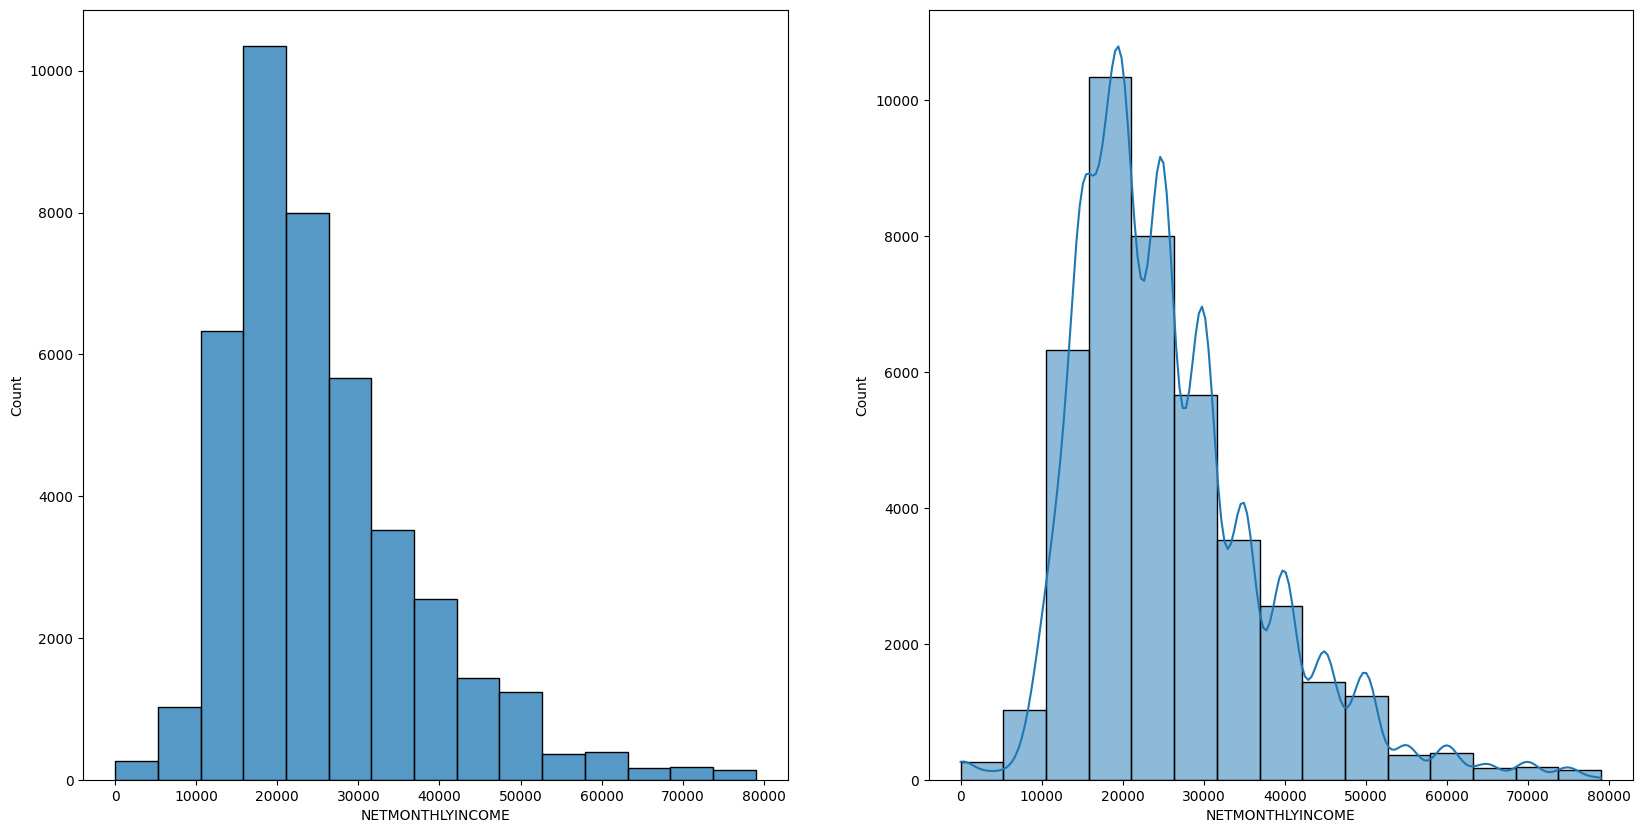

In [ ]:
pct_net_income = df['NETMONTHLYINCOME'].quantile(0.99)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(data=df[df['NETMONTHLYINCOME']<pct_net_income], x='NETMONTHLYINCOME', bins=15)
plt.subplot(1,2,2)
sns.histplot(data=df[df['NETMONTHLYINCOME']<pct_net_income], x='NETMONTHLYINCOME', bins=15, kde=True)
plt.show()

In [ ]:
fig = px.box(data_frame = df[df['NETMONTHLYINCOME']<pct_net_income], x='GENDER', y='NETMONTHLYINCOME', color='Approved_Flag')
fig.update_layout(title_text='monthly income distribution w.r.t gender in all categories')
fig.show()

###Most of the people in the dataset have monthly salary between 15k-25k

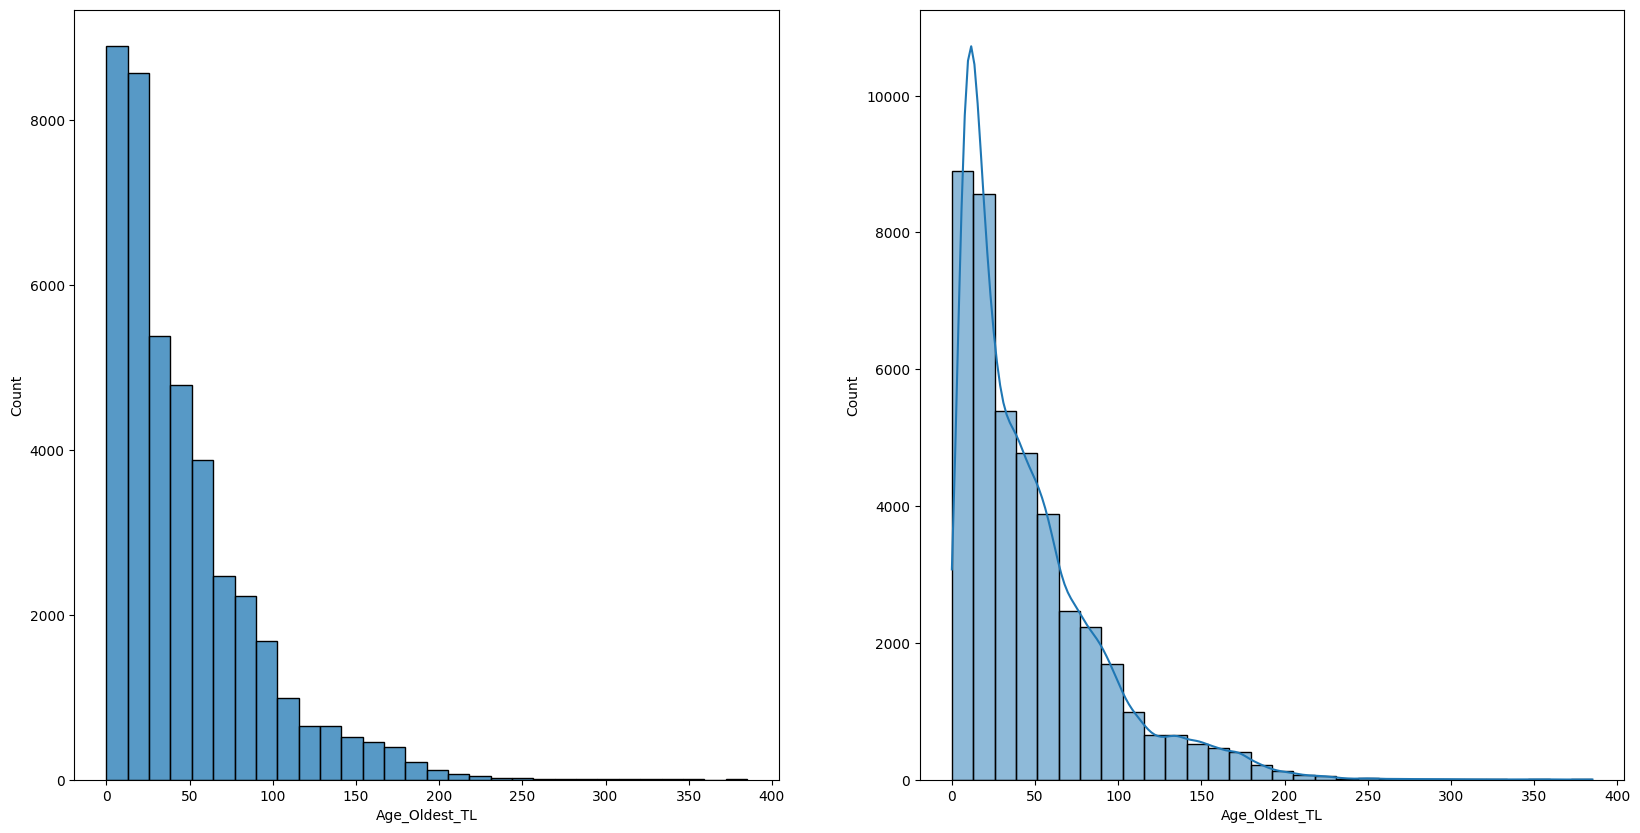

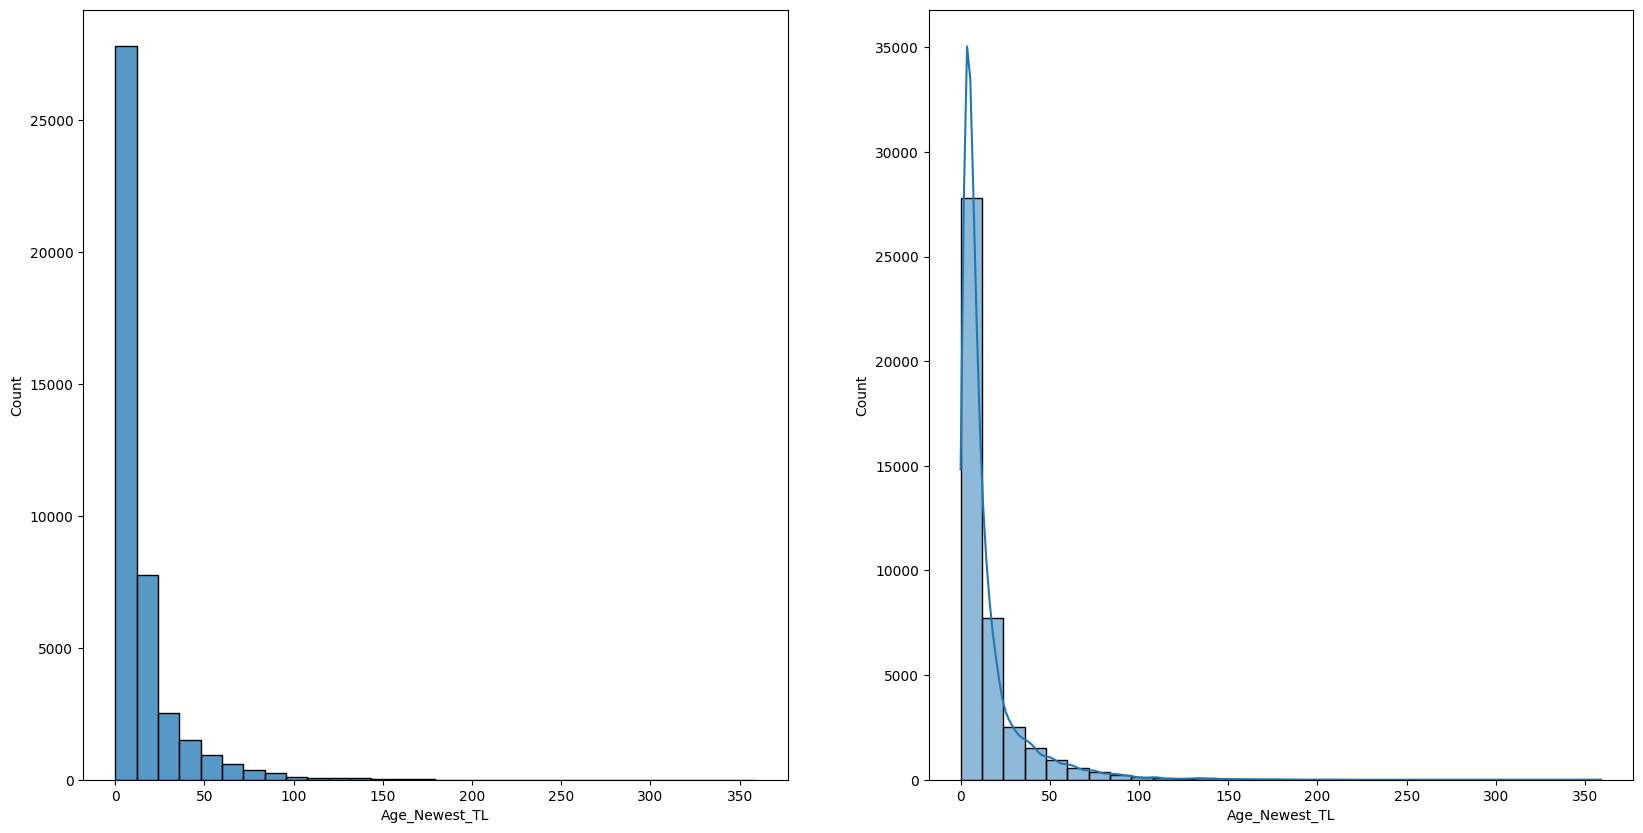

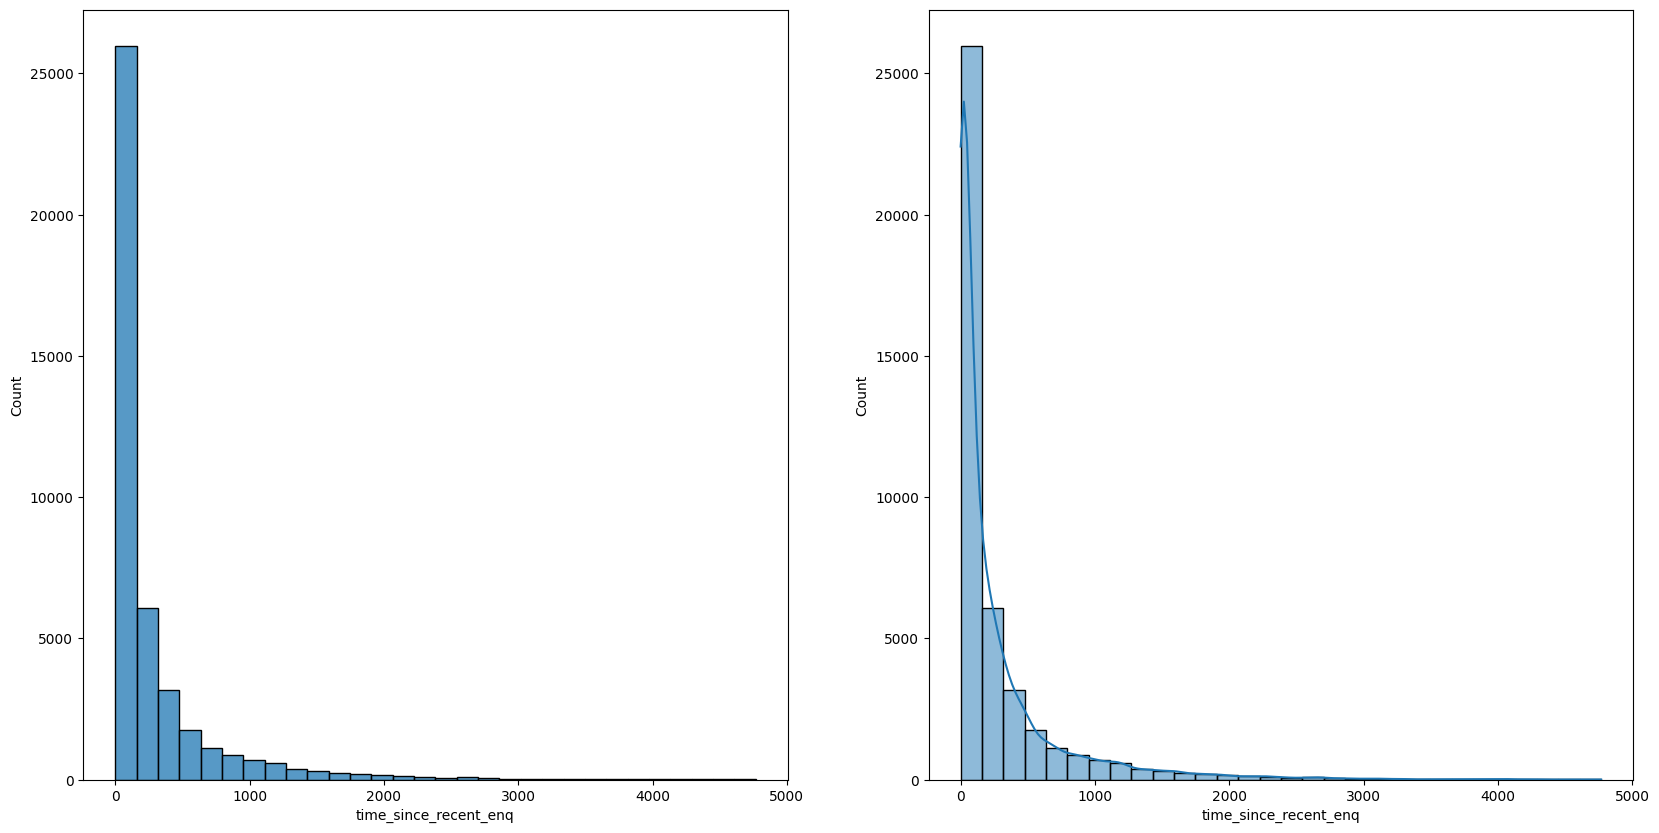

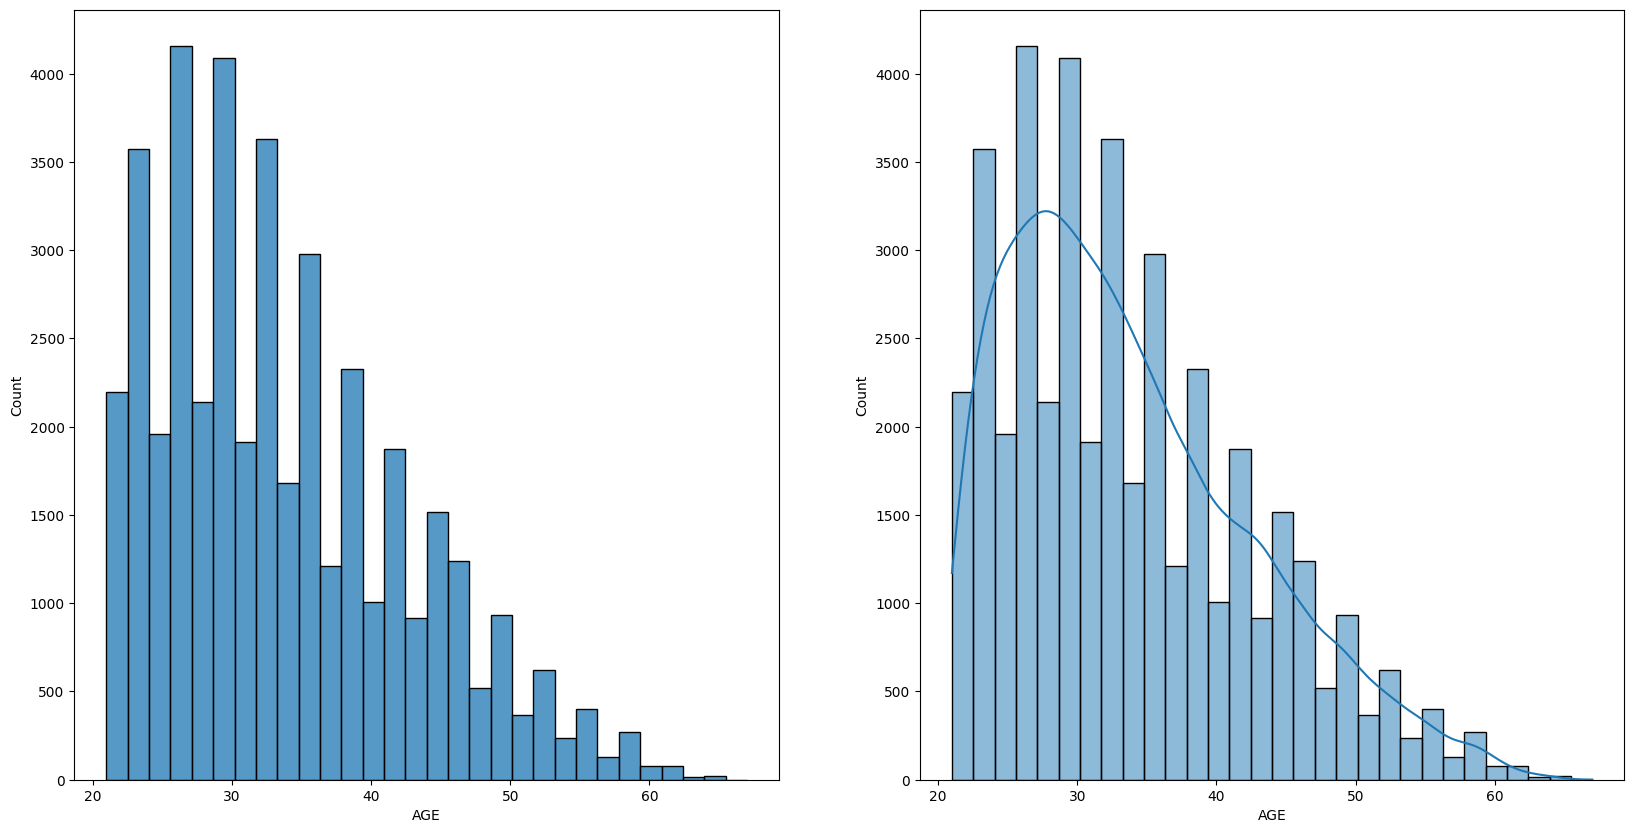

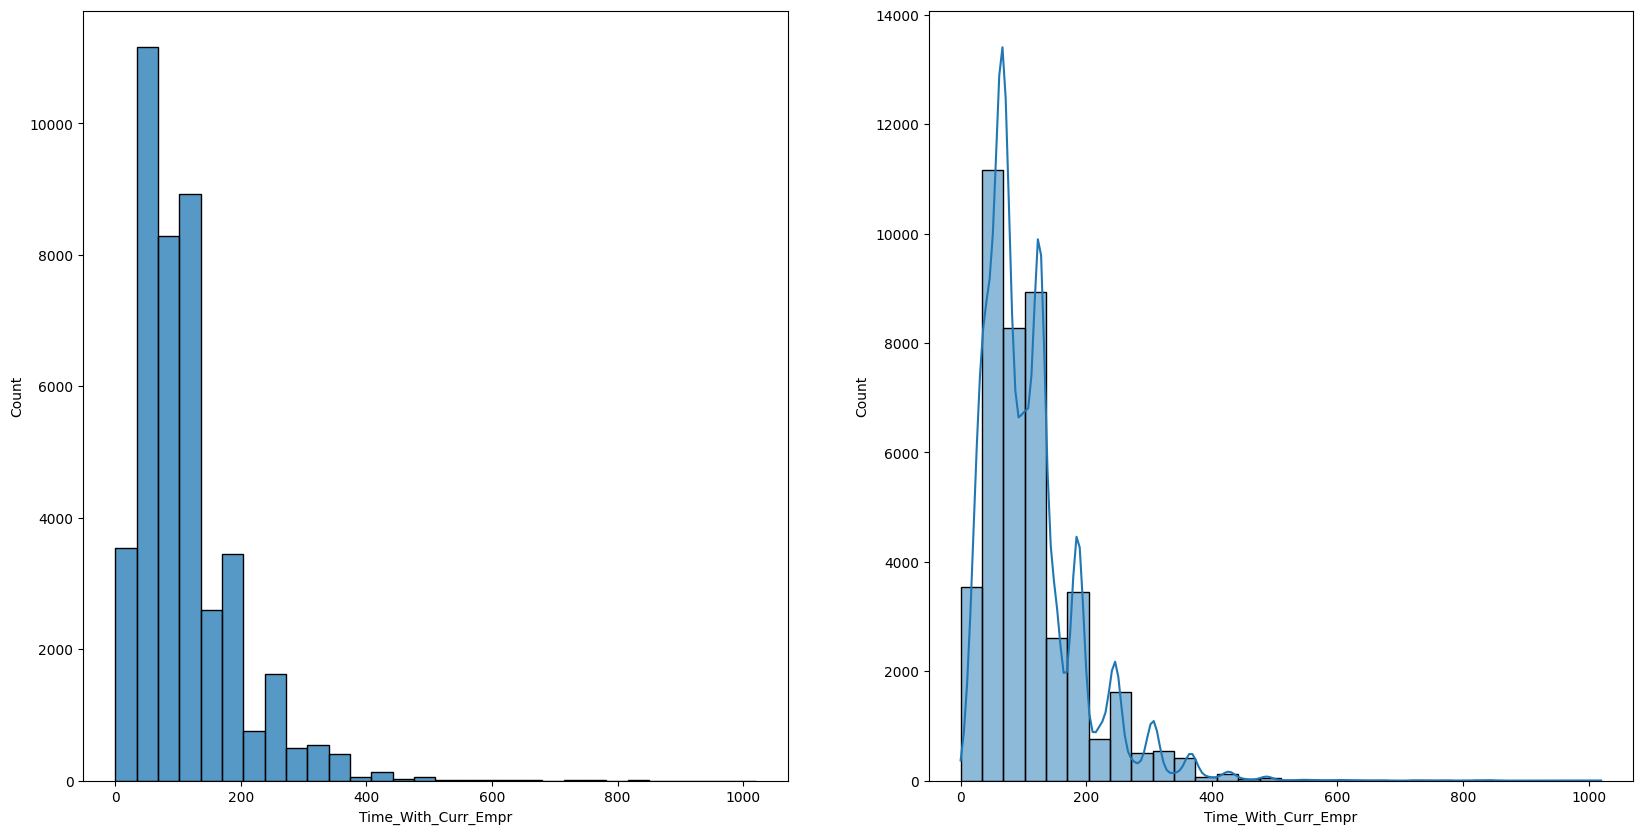

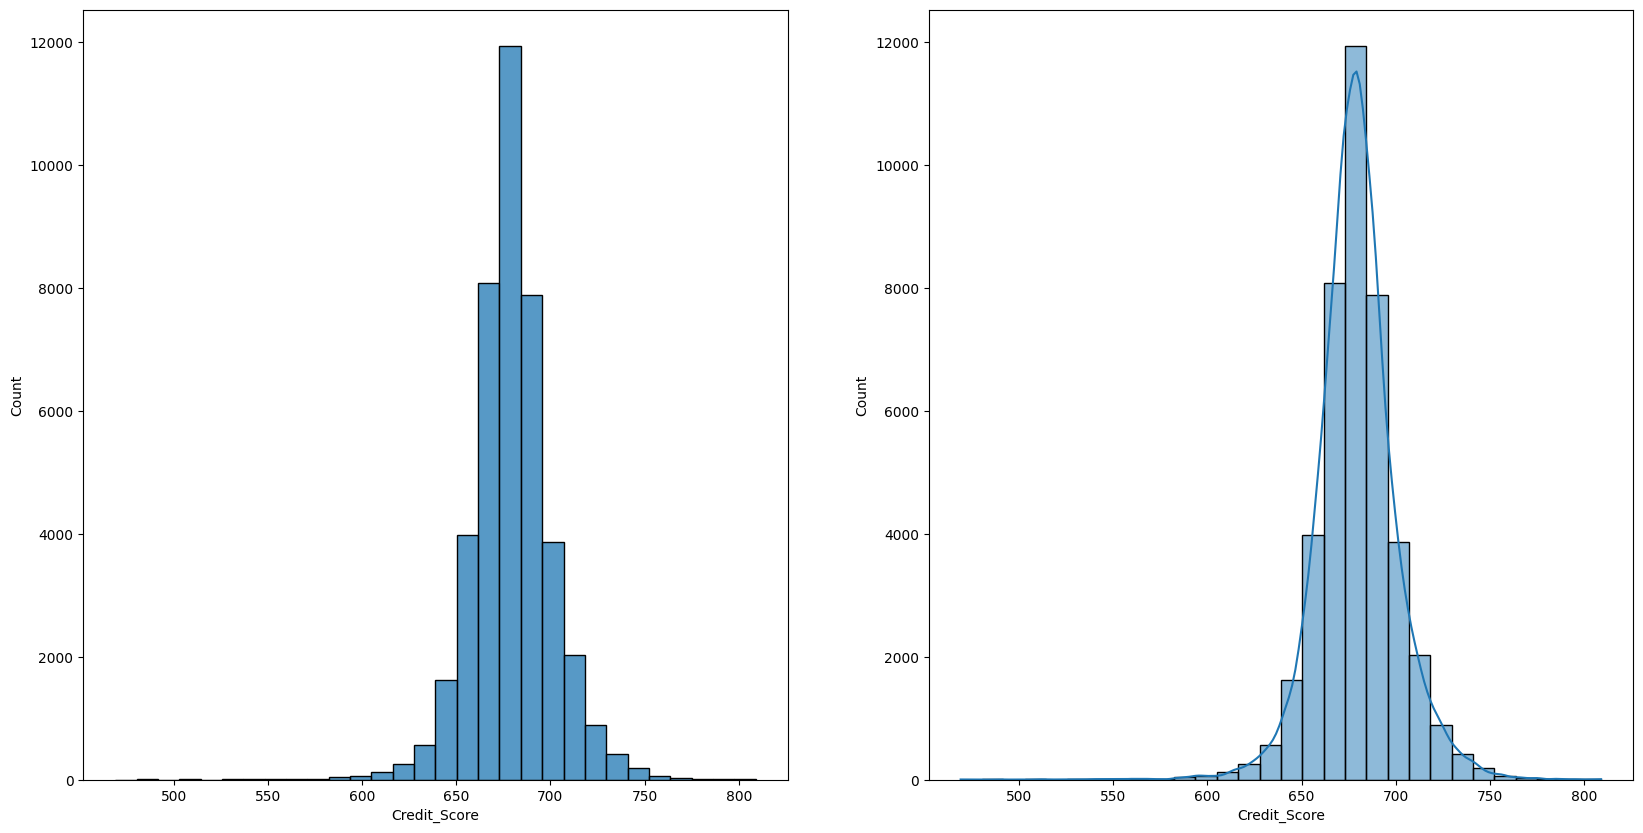

In [ ]:
cols_for_visualization = ['Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_enq', 'AGE', 'Time_With_Curr_Empr', 'Credit_Score']

for col in cols_for_visualization:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=col,  bins=30)
    plt.subplot(1,2,2)
    sns.histplot(x=df[col], bins=30, kde=True)
    plt.show()

### Observations for numerical features:
1. Age: The given dataset show that the bank is targeting young people with the age between 20-35 years old. This is true because the monthly income of the people is also in the range of 15k-25k which true for these age group people.
2.  Credit Score: The given dataset show that the credit score of majority of people lies between 650-750.
3. pct_tl_open_L6M, pct_tl_closed_L6M pct_tl_open_L12M and pct_tl_closed_L12M': Most of the people did not open any loan accounts/trade lines in the last 6 and 12 months. This is a good sign for the bank because they can target those people with no loan left. This might decrease the non perform asset account of the bank. Same goes with opening of trade lines in the last 6-12 months
4. Tot_Missed_Pmnt: Most of the people did not missed their monthly EMI.

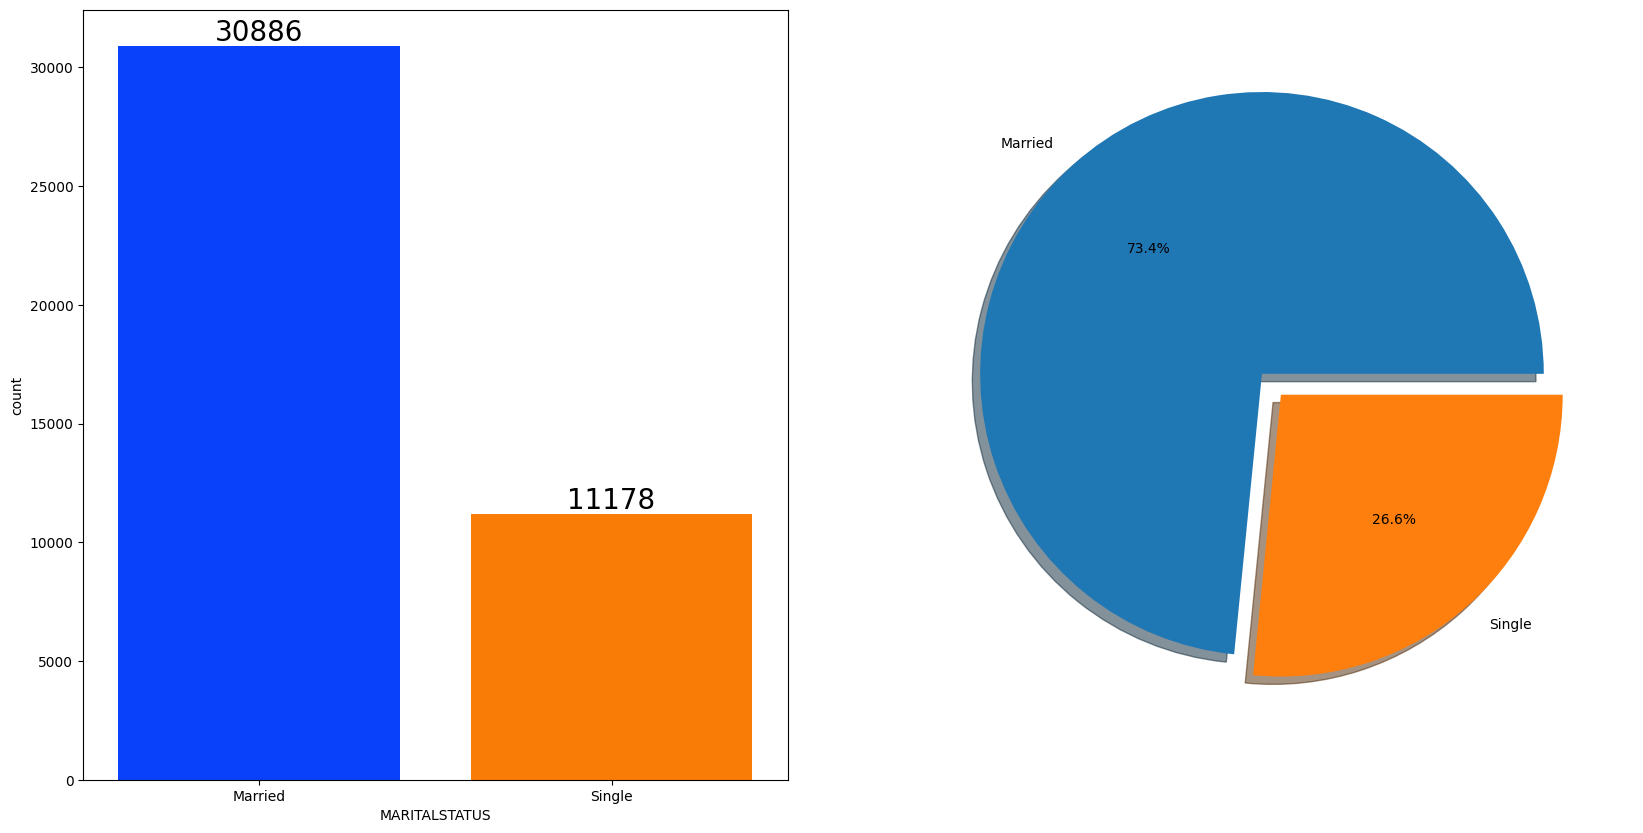

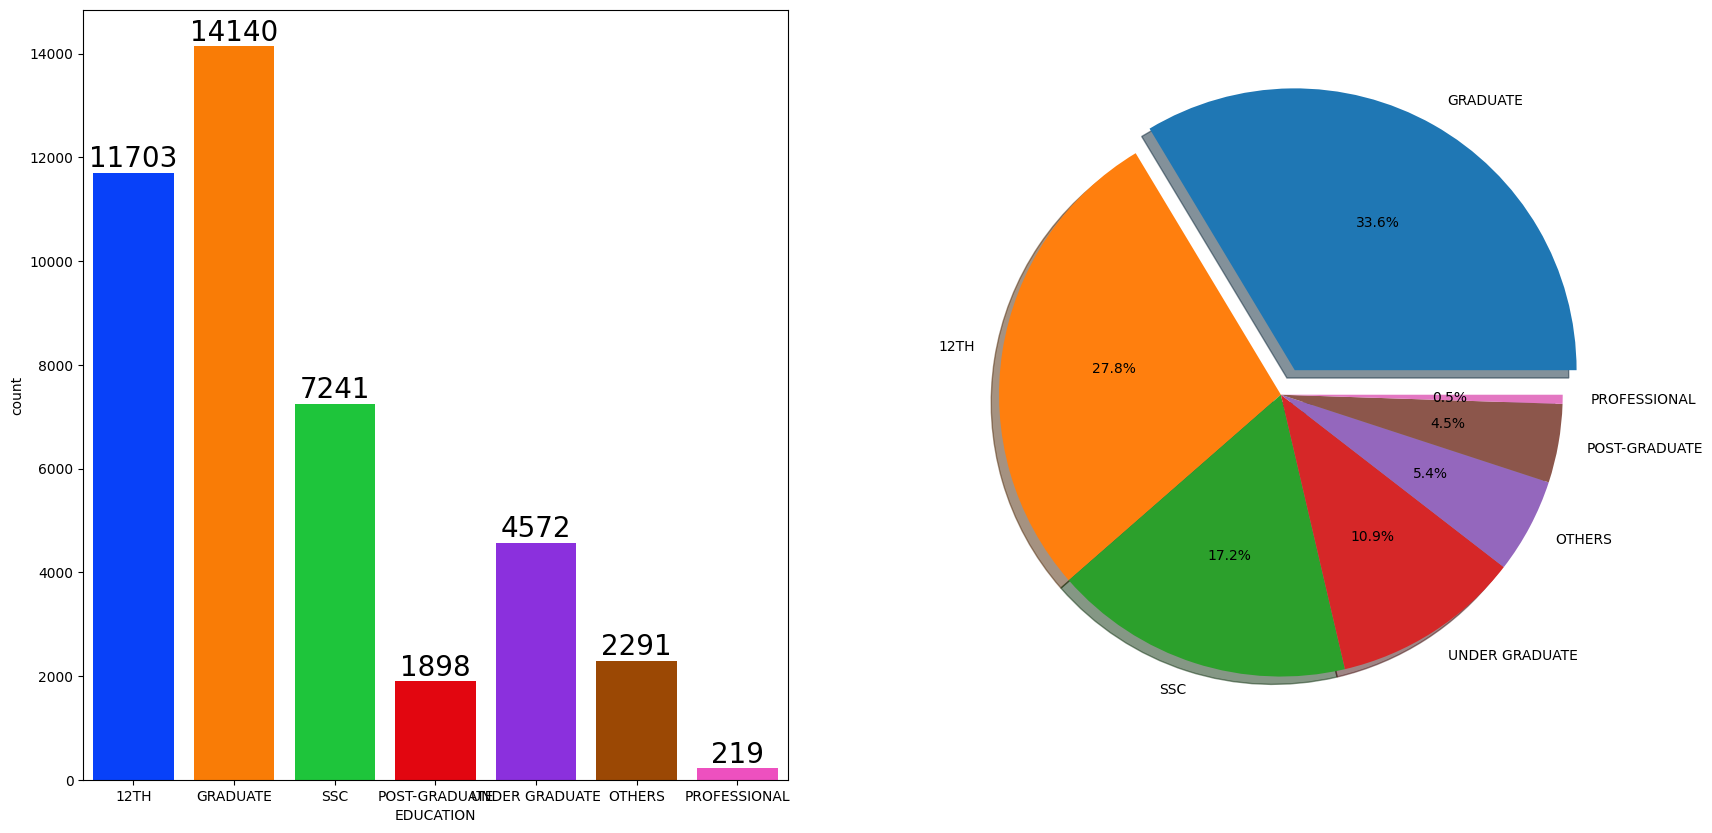

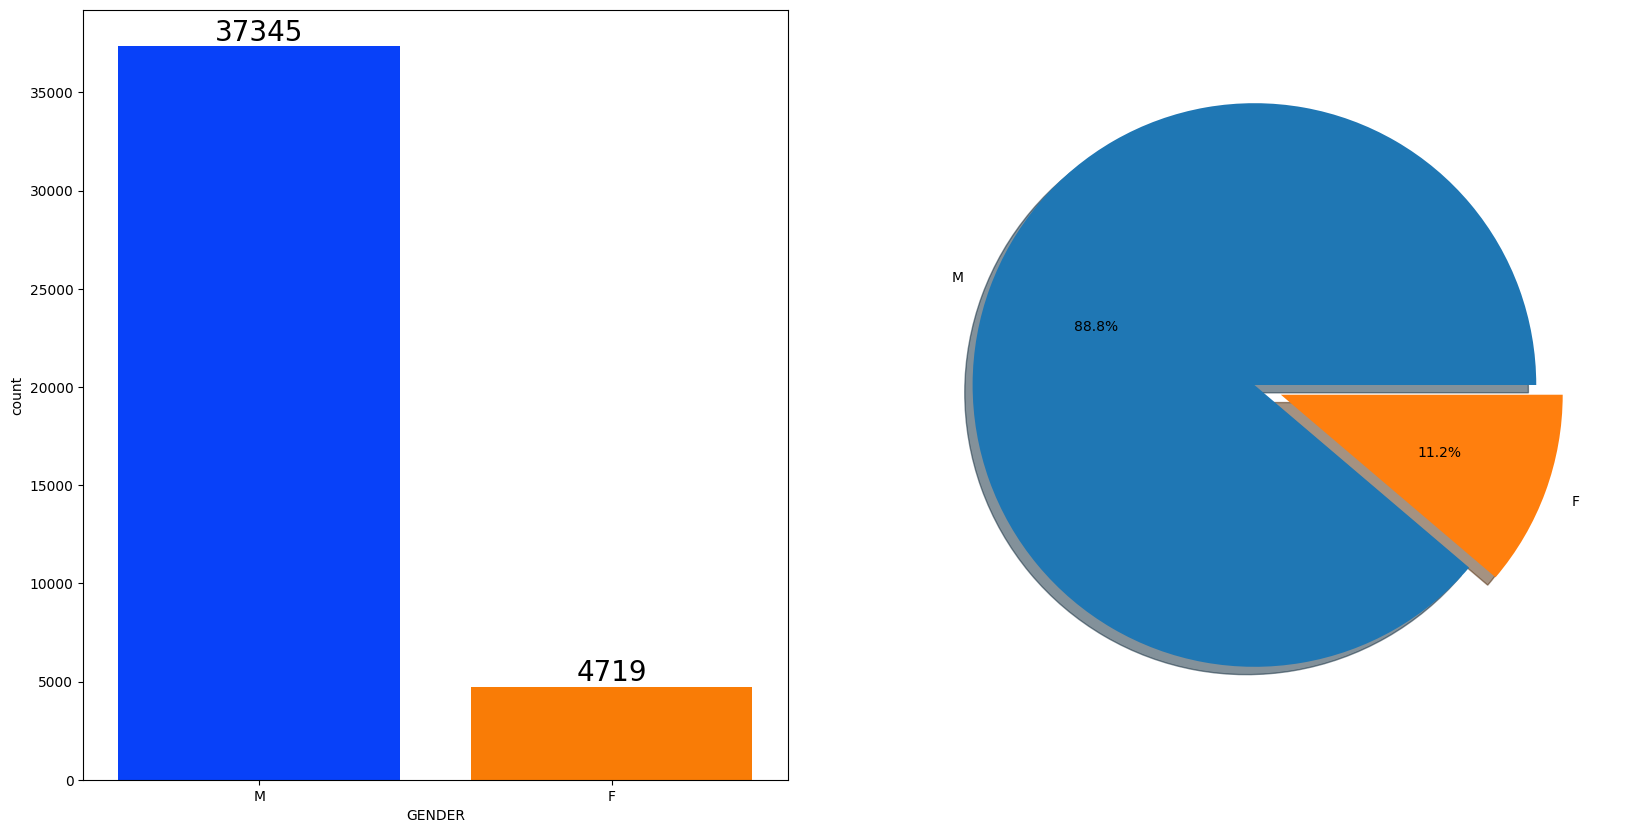

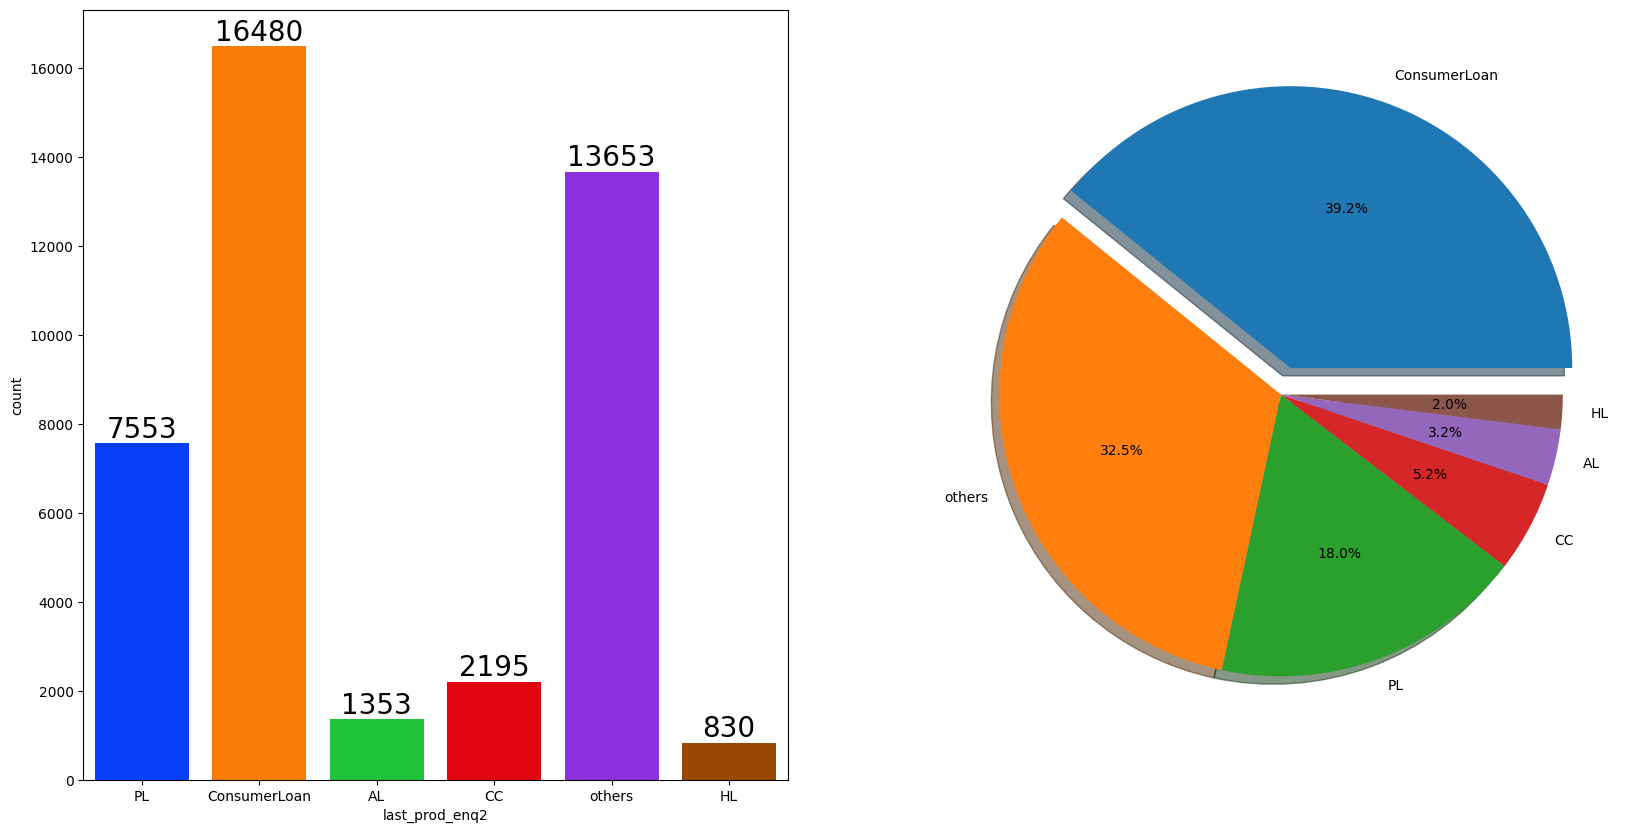

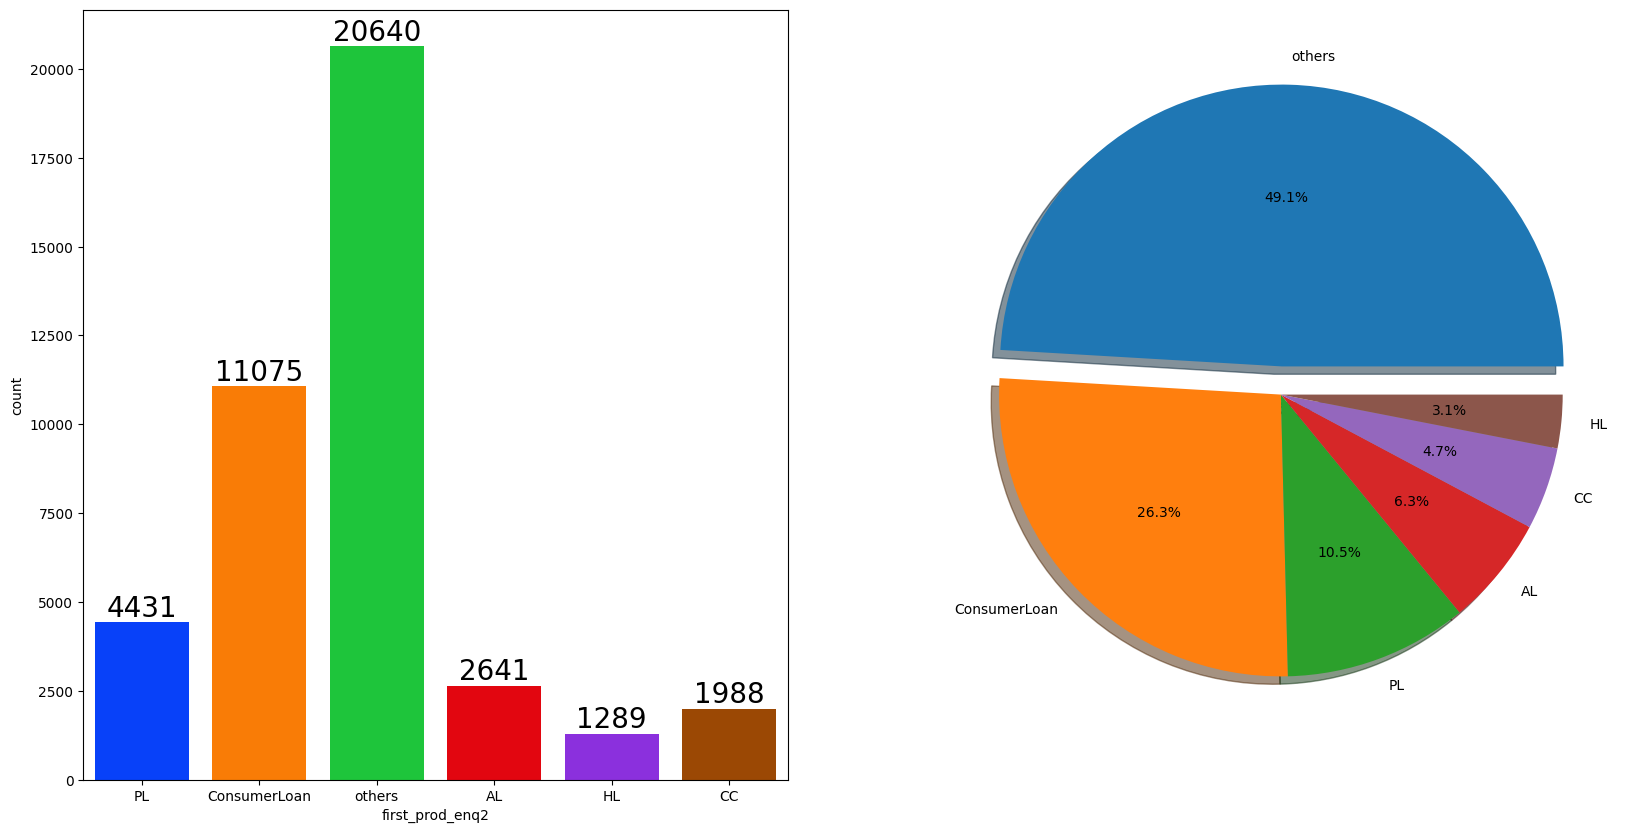

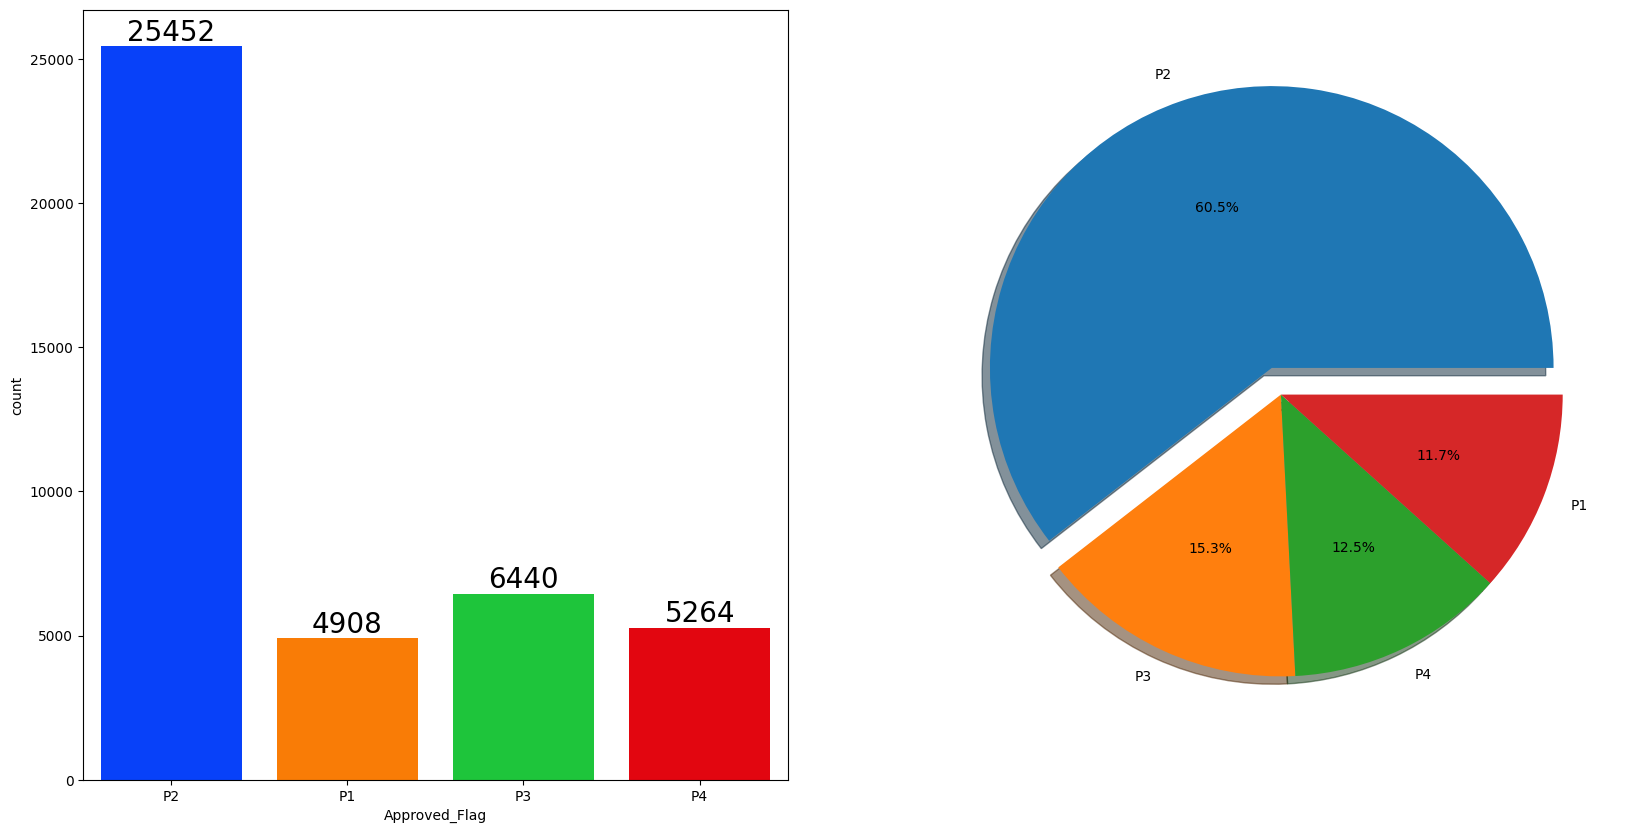

In [ ]:
for co in cat_col:
    f, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Countplot in the first subplot
    sns.countplot(x=co, data=df, palette='bright', ax=ax[0], saturation=0.95)

    for container in ax[0].containers:
        ax[0].bar_label(container, color='black', size=20)

    # Pie chart in the second subplot
    counts = df[co].value_counts()
    explode = [0.1 if count == max(counts) else 0 for count in counts]
    ax[1].pie(x=counts, labels=counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

    plt.show()

#### Observations

1. 73% people are married people in the dataset
2. 88% of people are men in the dataset who have taken loan or have loan to loan
3. Graduate people have more likelihood of taking or applying for loans
4. Previous loans taken by the people in this dataset is other loan or consumer loans (such as furniture loan, fridge loan etc)
5. Most of the people in the dataset flows under P2 category for loan approval.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [ ]:
df.isnull().sum().sum()

0

# Model Building

In [ ]:
df[col_to_kept_remaing]

,PROSPECTID,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag
0,1,0.000,0.00,0,0.000,0,0,0,4,1,...,566,0,51000,114,0,1,0.000,0.0,1,0
1,2,0.000,0.00,0,0.000,0,0,0,0,0,...,209,0,19000,50,0,0,0.000,0.0,0,0
2,3,0.125,0.00,0,0.000,1,0,0,0,2,...,587,0,18,191,0,0,0.000,0.0,1,0
3,5,0.000,0.00,0,0.000,0,0,0,0,3,...,3951,0,15000,75,0,0,0.000,0.0,0,0
4,6,0.000,0.00,1,0.167,0,0,0,0,6,...,7,4,0,154,0,0,0.429,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,0.333,0.00,0,0.000,0,0,0,0,0,...,0,1,18500,249,0,0,0.000,0.0,0,0
42060,51333,0.000,0.25,1,0.250,0,0,0,0,2,...,203,0,25000,186,0,0,0.000,0.0,0,0
42061,51334,0.500,0.50,1,0.500,0,0,0,0,0,...,1,2,18000,66,0,0,1.000,0.0,0,0
42062,51335,0.000,0.00,1,0.500,0,0,0,0,0,...,242,0,12802,54,0,0,0.000,0.0,0,0


# Add the cat col in col_to_kept_remaining

In [ ]:
col_to_kept_remaing.extend(cat_col)

In [ ]:
df_final = df[col_to_kept_remaing]

In [ ]:
df_final

,PROSPECTID,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,1,0.000,0.00,0,0.000,0,0,0,4,1,...,0.000,0.0,1,0,Married,12TH,M,PL,PL,P2
1,2,0.000,0.00,0,0.000,0,0,0,0,0,...,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,3,0.125,0.00,0,0.000,1,0,0,0,2,...,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others,P2
3,5,0.000,0.00,0,0.000,0,0,0,0,3,...,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,P1
4,6,0.000,0.00,1,0.167,0,0,0,0,6,...,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,0.333,0.00,0,0.000,0,0,0,0,0,...,0.000,0.0,0,0,Married,12TH,M,ConsumerLoan,ConsumerLoan,P4
42060,51333,0.000,0.25,1,0.250,0,0,0,0,2,...,0.000,0.0,0,0,Married,SSC,M,others,others,P1
42061,51334,0.500,0.50,1,0.500,0,0,0,0,0,...,1.000,0.0,0,0,Married,SSC,M,ConsumerLoan,others,P3
42062,51335,0.000,0.00,1,0.500,0,0,0,0,0,...,0.000,0.0,0,0,Single,UNDER GRADUATE,F,ConsumerLoan,others,P2


# Encoding the target columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

In [ ]:
df_final['Approved_Flag'].value_counts()

Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: count, dtype: int64

In [ ]:
df_final['Approved_Flag']=df_final['Approved_Flag'].map({
    "P1":0,
    "P2":1,
    "P3":2,
    "P4":3
})

In [ ]:
df_final['Approved_Flag'].value_counts()

Approved_Flag
1    25452
2     6440
3     5264
0     4908
Name: count, dtype: int64

# separate the feature and label

In [ ]:
feature=df_final.drop(columns='Approved_Flag')
label=df_final['Approved_Flag']

In [ ]:
feature.head(2)

,PROSPECTID,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2
0,1,0.0,0.0,0,0.0,0,0,0,4,1,...,1,0.0,0.0,1,0,Married,12TH,M,PL,PL
1,2,0.0,0.0,0,0.0,0,0,0,0,0,...,0,0.0,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan


In [ ]:
label

0        1
1        1
2        1
3        0
4        2
        ..
42059    3
42060    0
42061    2
42062    1
42063    1
Name: Approved_Flag, Length: 42064, dtype: int64

In [ ]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3


# Others has to be verified by the business end user




feature.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
feature.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
feature.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
feature.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
feature.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
feature.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
feature.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [ ]:
feature['EDUCATION'].value_counts()
feature['EDUCATION'] = feature['EDUCATION'].astype(int)

In [ ]:
df_encoded = pd.get_dummies(feature, columns=['MARITALSTATUS', 'GENDER', 'last_prod_enq2', 'first_prod_enq2'])

# Convert boolean values to integers
df_encoded = df_encoded.astype(int)

# Check the result
df_encoded.info()
k = df_encoded.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   PROSPECTID                    42064 non-null  int64
 1   pct_tl_open_L6M               42064 non-null  int64
 2   pct_tl_closed_L6M             42064 non-null  int64
 3   Tot_TL_closed_L12M            42064 non-null  int64
 4   pct_tl_closed_L12M            42064 non-null  int64
 5   Tot_Missed_Pmnt               42064 non-null  int64
 6   CC_TL                         42064 non-null  int64
 7   Home_TL                       42064 non-null  int64
 8   PL_TL                         42064 non-null  int64
 9   Secured_TL                    42064 non-null  int64
 10  Unsecured_TL                  42064 non-null  int64
 11  Other_TL                      42064 non-null  int64
 12  Age_Oldest_TL                 42064 non-null  int64
 13  Age_Newest_TL                 4

In [ ]:
df_encoded

,PROSPECTID,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,1,0,0,0,0,0,0,0,4,1,...,0,0,1,0,0,0,0,0,1,0
1,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,0,0,2,...,1,0,0,0,0,0,0,0,0,1
3,5,0,0,0,0,0,0,0,0,3,...,0,0,0,0,1,0,0,0,0,0
4,6,0,0,1,0,0,0,0,0,6,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
42060,51333,0,0,1,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,1
42061,51334,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
42062,51335,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df_encoded.columns

Index(['PROSPECTID', 'pct_tl_open_L6M', 'pct_tl_closed_L6M',
       'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL',
       'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL',
       'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag', 'EDUCATION',
       'MARITALSTATUS_Married', 'MARITALSTATUS_Single', 'GENDER_F', 'GENDER_M',
       'last_prod_enq2_AL', 'last_prod_enq2_CC', 'last_prod_enq2_ConsumerLoan',
       'last_prod_enq2_HL', 'last_prod_enq2_PL', 'last_prod_enq2_others',
       'first_prod_enq2_AL', 'f

In [ ]:
df_encoded.shape

(42064, 55)

In [ ]:
import pandas as pd
df_encoded = pd.concat([df_encoded, label], axis=1)

#LogisticRegression

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, cohen_kappa_score, roc_auc_score, confusion_matrix, balanced_accuracy_score


y = df_encoded['Approved_Flag']
X = df_encoded.drop(['Approved_Flag'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200, random_state=42)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print()
print(f'Accuracy: {accuracy:.2f}')
print()

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

# Print precision, recall, and F1 score for each class
for i, v in enumerate(['P1', 'P2', 'P3', 'P4']):
    print(f'Class {v}:')
    print(f'  Precision: {precision[i]:.2f}')
    print(f'  Recall: {recall[i]:.2f}')
    print(f'  F1 Score: {f1_score[i]:.2f}')
    print()

# Calculate and print Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f'Cohen Kappa: {cohen_kappa:.2f}')
print()

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_acc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Macro and Weighted Averages
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'Macro Precision: {precision_macro:.2f}, Macro Recall: {recall_macro:.2f}, Macro F1: {f1_macro:.2f}')
print(f'Weighted Precision: {precision_weighted:.2f}, Weighted Recall: {recall_weighted:.2f}, Weighted F1: {f1_weighted:.2f}')

# AUC-ROC for each class
roc_auc = {}
for i in range(4):
    roc_auc[f'P{i+1}'] = roc_auc_score(y_test == i, y_pred_proba[:, i])
print('AUC-ROC for each class:')
for k, v in roc_auc.items():
    print(f'  {k}: {v:.2f}')



Accuracy: 0.61

Class P1:
  Precision: 0.58
  Recall: 0.20
  F1 Score: 0.29

Class P2:
  Precision: 0.61
  Recall: 0.97
  F1 Score: 0.75

Class P3:
  Precision: 0.00
  Recall: 0.00
  F1 Score: 0.00

Class P4:
  Precision: 0.39
  Recall: 0.04
  F1 Score: 0.07

Cohen Kappa: 0.08

Balanced Accuracy: 0.30
Confusion Matrix:
[[ 199  805    0   10]
 [ 119 4892    2   32]
 [  21 1282    0   22]
 [   3  984    1   41]]
Macro Precision: 0.40, Macro Recall: 0.30, Macro F1: 0.28
Weighted Precision: 0.49, Weighted Recall: 0.61, Weighted F1: 0.50
AUC-ROC for each class:
  P1: 0.77
  P2: 0.65
  P3: 0.62
  P4: 0.82


#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, cohen_kappa_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

# Load and split the data
y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
y_pred_proba = dt_model.predict_proba(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.2f}")
print()

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['P1', 'P2', 'P3', 'P4']):
    print(f"Class {v}:")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall: {recall[i]:.2f}")
    print(f"  F1 Score: {f1_score[i]:.2f}")

# Calculate Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen Kappa: {cohen_kappa:.2f}")

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Macro and Weighted Averages
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Macro Precision: {precision_macro:.2f}, Macro Recall: {recall_macro:.2f}, Macro F1: {f1_macro:.2f}")
print(f"Weighted Precision: {precision_weighted:.2f}, Weighted Recall: {recall_weighted:.2f}, Weighted F1: {f1_weighted:.2f}")

# AUC-ROC for each class
roc_auc = {}
for i in range(4):
    roc_auc[f'P{i+1}'] = roc_auc_score(y_test == i, y_pred_proba[:, i])
print("AUC-ROC for each class:")
for k, v in roc_auc.items():
    print(f"  {k}: {v:.2f}")



Accuracy: 0.71

Class P1:
  Precision: 0.73
  Recall: 0.72
  F1 Score: 0.73
Class P2:
  Precision: 0.81
  Recall: 0.83
  F1 Score: 0.82
Class P3:
  Precision: 0.35
  Recall: 0.32
  F1 Score: 0.33
Class P4:
  Precision: 0.63
  Recall: 0.62
  F1 Score: 0.62
Cohen Kappa: 0.50
Balanced Accuracy: 0.62
Confusion Matrix:
[[ 733  249   28    4]
 [ 231 4195  499  120]
 [  34  620  420  251]
 [   1  128  266  634]]
Macro Precision: 0.63, Macro Recall: 0.62, Macro F1: 0.63
Weighted Precision: 0.70, Weighted Recall: 0.71, Weighted F1: 0.71
AUC-ROC for each class:
  P1: 0.88
  P2: 0.81
  P3: 0.67
  P4: 0.86


#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, cohen_kappa_score, roc_auc_score, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import train_test_split

# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Prepare data
y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'], axis=1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Train the model
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
y_pred_proba = rf_classifier.predict_proba(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['P1', 'P2', 'P3', 'P4']):
    print(f'Class {v}:')
    print(f'  Precision: {precision[i]:.2f}')
    print(f'  Recall: {recall[i]:.2f}')
    print(f'  F1 Score: {f1_score[i]:.2f}')

# Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f'Cohen Kappa: {cohen_kappa:.2f}')

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_acc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Macro and Weighted Averages
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'Macro Precision: {precision_macro:.2f}, Macro Recall: {recall_macro:.2f}, Macro F1: {f1_macro:.2f}')
print(f'Weighted Precision: {precision_weighted:.2f}, Weighted Recall: {recall_weighted:.2f}, Weighted F1: {f1_weighted:.2f}')

# AUC-ROC for each class
roc_auc = {}
for i in range(4):
    roc_auc[f'P{i+1}'] = roc_auc_score(y_test == i, y_pred_proba[:, i])
print('AUC-ROC for each class:')
for k, v in roc_auc.items():
    print(f'  {k}: {v:.2f}')


Accuracy: 0.76
Class P1:
  Precision: 0.83
  Recall: 0.71
  F1 Score: 0.77
Class P2:
  Precision: 0.80
  Recall: 0.93
  F1 Score: 0.86
Class P3:
  Precision: 0.43
  Recall: 0.20
  F1 Score: 0.27
Class P4:
  Precision: 0.73
  Recall: 0.72
  F1 Score: 0.73
Cohen Kappa: 0.56
Balanced Accuracy: 0.64
Confusion Matrix:
[[ 718  296    0    0]
 [ 114 4698  186   47]
 [  29  795  267  234]
 [   1  116  166  746]]
Macro Precision: 0.70, Macro Recall: 0.64, Macro F1: 0.66
Weighted Precision: 0.73, Weighted Recall: 0.76, Weighted F1: 0.74
AUC-ROC for each class:
  P1: 0.98
  P2: 0.90
  P3: 0.81
  P4: 0.97


#xgboost

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, cohen_kappa_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

# XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'], axis=1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)
y_pred_proba = xgb_classifier.predict_proba(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['P1', 'P2', 'P3', 'P4']):
    print(f'Class {v}:')
    print(f'  Precision: {precision[i]:.2f}')
    print(f'  Recall: {recall[i]:.2f}')
    print(f'  F1 Score: {f1_score[i]:.2f}')

# Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f'Cohen Kappa: {cohen_kappa:.2f}')

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_acc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Macro and Weighted Averages
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'Macro Precision: {precision_macro:.2f}, Macro Recall: {recall_macro:.2f}, Macro F1: {f1_macro:.2f}')
print(f'Weighted Precision: {precision_weighted:.2f}, Weighted Recall: {recall_weighted:.2f}, Weighted F1: {f1_weighted:.2f}')

# AUC-ROC for each class
roc_auc = {}
for i in range(4):
    roc_auc[f'P{i+1}'] = roc_auc_score(y_test == i, y_pred_proba[:, i])
print('AUC-ROC for each class:')
for k, v in roc_auc.items():
    print(f'  {k}: {v:.2f}')


Accuracy: 0.77
Class P1:
  Precision: 0.82
  Recall: 0.76
  F1 Score: 0.79
Class P2:
  Precision: 0.82
  Recall: 0.91
  F1 Score: 0.86
Class P3:
  Precision: 0.44
  Recall: 0.27
  F1 Score: 0.33
Class P4:
  Precision: 0.73
  Recall: 0.74
  F1 Score: 0.73
Cohen Kappa: 0.59
Balanced Accuracy: 0.67
Confusion Matrix:
[[ 774  240    0    0]
 [ 137 4594  265   49]
 [  32  706  359  228]
 [   0   74  197  758]]
Macro Precision: 0.70, Macro Recall: 0.67, Macro F1: 0.68
Weighted Precision: 0.75, Weighted Recall: 0.77, Weighted F1: 0.75
AUC-ROC for each class:
  P1: 0.98
  P2: 0.91
  P3: 0.83
  P4: 0.97


In [ ]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.6 MB/s eta 0:00:00


In [ ]:
import optuna
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, cohen_kappa_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

# Prepare data
y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'], axis=1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'multi:softmax',
        'num_class': 4,
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True)
    }

    xgb_classifier = xgb.XGBClassifier(**param)
    xgb_classifier.fit(x_train, y_train)
    y_pred = xgb_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best parameters
best_params = study.best_params
print(f'Best parameters: {best_params}')

# Train the model with the best parameters
best_xgb_classifier = xgb.XGBClassifier(**best_params, objective='multi:softmax', num_class=4)
best_xgb_classifier.fit(x_train, y_train)
y_pred = best_xgb_classifier.predict(x_test)
y_pred_proba = best_xgb_classifier.predict_proba(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['P1', 'P2', 'P3', 'P4']):
    print(f'Class {v}:')
    print(f'  Precision: {precision[i]:.2f}')
    print(f'  Recall: {recall[i]:.2f}')
    print(f'  F1 Score: {f1_score[i]:.2f}')

# Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f'Cohen Kappa: {cohen_kappa:.2f}')

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_acc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Macro and Weighted Averages
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'Macro Precision: {precision_macro:.2f}, Macro Recall: {recall_macro:.2f}, Macro F1: {f1_macro:.2f}')
print(f'Weighted Precision: {precision_weighted:.2f}, Weighted Recall: {recall_weighted:.2f}, Weighted F1: {f1_weighted:.2f}')

# AUC-ROC for each class
roc_auc = {}
for i in range(4):
    roc_auc[f'P{i+1}'] = roc_auc_score(y_test == i, y_pred_proba[:, i])
print('AUC-ROC for each class:')
for k, v in roc_auc.items():
    print(f'  {k}: {v:.2f}')


[I 2024-07-20 11:50:24,284] A new study created in memory with name: no-name-9469ddea-ddc2-4f06-aa1e-bb5e9b5bd9ca
[I 2024-07-20 11:50:53,176] Trial 0 finished with value: 0.7791513134434803 and parameters: {'n_estimators': 453, 'learning_rate': 0.03926917953680953, 'max_depth': 5, 'subsample': 0.8527535896537763, 'colsample_bytree': 0.939646155626694, 'gamma': 0.01105499628732165, 'lambda': 0.0245279634145773, 'alpha': 0.0036316978440807672}. Best is trial 0 with value: 0.7791513134434803.
[I 2024-07-20 11:50:56,894] Trial 1 finished with value: 0.7773683584928087 and parameters: {'n_estimators': 127, 'learning_rate': 0.08456720746651557, 'max_depth': 5, 'subsample': 0.8696594944042074, 'colsample_bytree': 0.9680748082979072, 'gamma': 0.33170161370159645, 'lambda': 5.867625994582749e-06, 'alpha': 0.0258322253593972}. Best is trial 0 with value: 0.7791513134434803.
[I 2024-07-20 11:51:01,840] Trial 2 finished with value: 0.777724949482943 and parameters: {'n_estimators': 131, 'learning_

Best parameters: {'n_estimators': 329, 'learning_rate': 0.19328538386941185, 'max_depth': 3, 'subsample': 0.7952629016795872, 'colsample_bytree': 0.7742838214153738, 'gamma': 0.23336588056932886, 'lambda': 4.9777422790732445e-05, 'alpha': 1.9154422504628868e-05}
Accuracy: 0.78
Class P1:
  Precision: 0.84
  Recall: 0.77
  F1 Score: 0.80
Class P2:
  Precision: 0.82
  Recall: 0.93
  F1 Score: 0.87
Class P3:
  Precision: 0.48
  Recall: 0.27
  F1 Score: 0.35
Class P4:
  Precision: 0.74
  Recall: 0.74
  F1 Score: 0.74
Cohen Kappa: 0.60
Balanced Accuracy: 0.68
Confusion Matrix:
[[ 778  236    0    0]
 [ 117 4668  215   45]
 [  31  710  364  220]
 [   0   82  187  760]]
Macro Precision: 0.72, Macro Recall: 0.68, Macro F1: 0.69
Weighted Precision: 0.76, Weighted Recall: 0.78, Weighted F1: 0.76
AUC-ROC for each class:
  P1: 0.98
  P2: 0.92
  P3: 0.83
  P4: 0.97


#Best parameters: {'n_estimators': 158, 'learning_rate': 0.18516552416961005, 'max_depth': 4, 'subsample': 0.5006492241500416, 'colsample_bytree': 0.9998885020119196, 'gamma': 0.2585066849082742, 'lambda': 0.011270791221966328, 'alpha': 7.795790152266869e-05}
Accuracy: 0.78
Class P1:
  Precision: 0.84
  Recall: 0.78
  F1 Score: 0.81
Class P2:
  Precision: 0.82
  Recall: 0.92
  F1 Score: 0.87
Class P3:
  Precision: 0.47
  Recall: 0.29
  F1 Score: 0.36
Class P4:
  Precision: 0.74
  Recall: 0.73
  F1 Score: 0.73
Cohen Kappa: 0.61
Balanced Accuracy: 0.68
Confusion Matrix:
[[ 793  220    1    0]
 [ 119 4648  232   46]
 [  27  688  388  222]
 [   0   81  196  752]]
Macro Precision: 0.72, Macro Recall: 0.68, Macro F1: 0.69
Weighted Precision: 0.76, Weighted Recall: 0.78, Weighted F1: 0.77
AUC-ROC for each class:
  P1: 0.98
  P2: 0.92
  P3: 0.83
  P4: 0.97
  